In [208]:
import pyspark


In [18]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SimpleApp") \
    .master("local[*]") \
    .getOrCreate()

# Get the SparkContext from the SparkSession
sc = spark.sparkContext

In [19]:
rdd = sc.parallelize([1,2,3,4,5,6,7])

In [20]:
rdd2 = rdd.map(lambda x :x **3)

In [21]:
rdd2.take(3)

[1, 8, 27]

In [22]:
%%writefile exmaple.txt
first line
second line
third line
fourth line


Overwriting exmaple.txt


In [23]:
rdd_file = sc.textFile('exmaple.txt')

In [24]:
rdd_file.count()

4

In [25]:
rdd_file.collect()

['first line', 'second line', 'third line', 'fourth line']

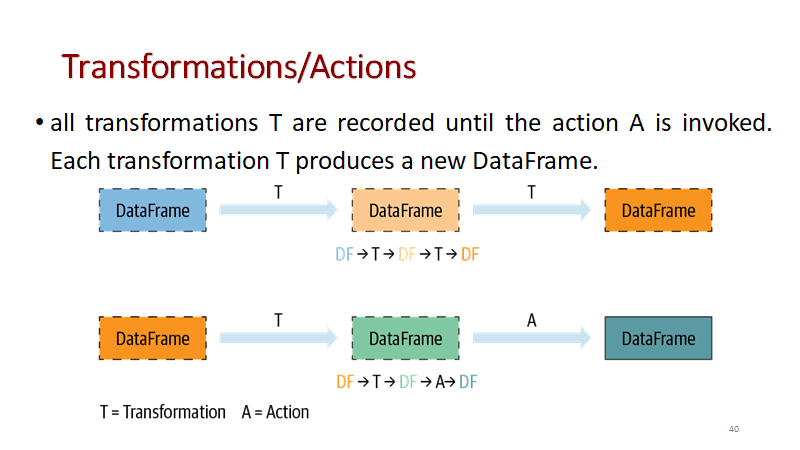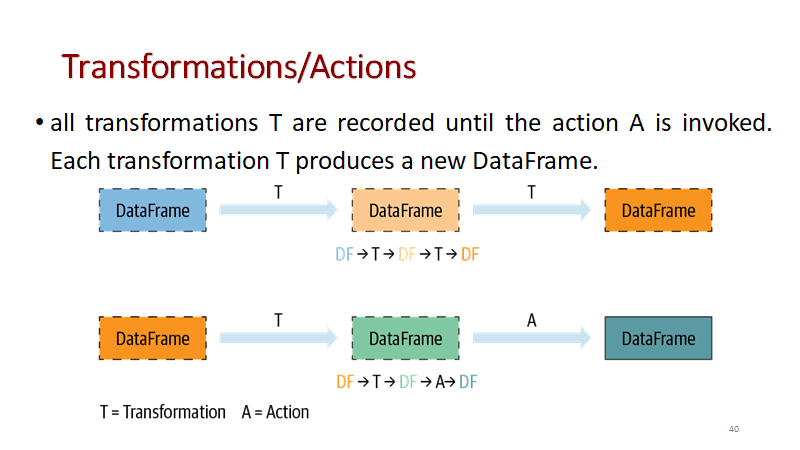

In [26]:
rdd_file_2 = rdd_file.filter(lambda line : 'second' in line)

In [27]:
rdd_file_2.collect()

['second line']

In [28]:
rdd = sc.parallelize([1,2,3,4,5,6,7])

In [29]:
rdd2 = rdd.map(lambda x : x**2)

In [30]:
rdd2.collect()

[1, 4, 9, 16, 25, 36, 49]

In [31]:
rdd3 = rdd2.map(lambda x : x**3)

In [32]:
rdd4 = rdd2.reduce(lambda a,b : a +b)

In [33]:
rdd4

140

In [34]:
rdd5 = rdd2.filter(lambda x : x > 5)

In [35]:
rdd5.collect()

[9, 16, 25, 36, 49]

In [36]:
new_data = list(range(100))
rdd_new = sc.parallelize(new_data)

In [37]:
rdd1 = rdd_new.map(lambda x:x**2)

In [38]:
rdd3 = rdd1.map(lambda x:x*2)

In [39]:
rdd4 = rdd1.map(lambda x:x/2)

In [40]:
rdd4.persist()

PythonRDD[12] at RDD at PythonRDD.scala:53

In [41]:
rdd4.is_cached

True

In [42]:
rdd4.take(5)

[0.0, 0.5, 2.0, 4.5, 8.0]

In [43]:
rdd_txt= rdd_file.map(lambda x :x.split())

In [44]:
rdd_txt.collect()

[['first', 'line'], ['second', 'line'], ['third', 'line'], ['fourth', 'line']]

In [45]:
rdd_txt2= rdd_file.flatMap(lambda x :x.split())

In [46]:
rdd_txt2.collect()

['first', 'line', 'second', 'line', 'third', 'line', 'fourth', 'line']

In [47]:
rdd_file.collect()

['first line', 'second line', 'third line', 'fourth line']

#### Narrow transformation are those where each input partition will contribute to only one output partition. 

## Wide transformation — specify wide dependencies, Wide transformation will have input partitions contributing to many output partitions.
## You will often hear this referred to as a shuffle, where Spark will exchange partitions across the cluster

In [68]:
l = [('A',10), ('B',10), ('B',90), ('S',50), ('A',30)]

In [69]:
rdd= sc.parallelize(l)

In [70]:
rdd2 = rdd.groupByKey()

In [77]:
ll = rdd2.collect()

In [78]:
[(a,list(b)) for a,b in ll]

[('B', [10, 90]), ('S', [50]), ('A', [10, 30])]

## Spark DataFrames

In [79]:
dataRDD = sc.parallelize([("Brooke", 20), ("Denny", 31), ("Jules", 30),
("TD", 35), ("Brooke", 25),("Jules", 40), ("Denny", 51)])

In [80]:
rdd2 = dataRDD.groupByKey()

In [81]:
list1=rdd2.collect()

In [82]:
[(a,list(b)) for a,b in list1]

[('Brooke', [20, 25]), ('Denny', [31, 51]), ('TD', [35]), ('Jules', [30, 40])]

In [83]:
rdd3 = rdd2.map(lambda x : (x[0], sum(x[1]) / len(x[1])))

In [84]:
rdd3.collect()

[('Brooke', 22.5), ('Denny', 41.0), ('TD', 35.0), ('Jules', 35.0)]

#### Here above describing that doing any transformation on the RDD is Pain, here we tried to calculate the avg for each Key, we did some operation on the data itself, but it would be painful if the transformation is huge or the size of the data is big (having many columns).

In [85]:
rdd_avg = dataRDD.groupByKey().map(lambda x : (x[0], sum(x[1]) / len(x[1])))

In [86]:
rdd_avg.collect()

[('Brooke', 22.5), ('Denny', 41.0), ('TD', 35.0), ('Jules', 35.0)]

In [87]:
from pyspark.sql.functions import avg
import pyspark.sql.functions as fn

In [88]:
data= [("Brooke", 20), ("Denny", 31), ("Jules", 30),
("TD", 35), ("Brooke", 25),("Jules", 40), ("Denny", 51)]

In [89]:
df = spark.createDataFrame(data, ['name', 'age'])

In [90]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [91]:
df.show()

+------+---+
|  name|age|
+------+---+
|Brooke| 20|
| Denny| 31|
| Jules| 30|
|    TD| 35|
|Brooke| 25|
| Jules| 40|
| Denny| 51|
+------+---+



In [92]:
df.collect()[0].age

20

## Grouping Data

### PySpark DataFrame also provides a way of handling grouped data by using the common approach, split-apply-combine strategy.
### It groups the data by a certain condition applies a function to each group and then combines them back to the DataFrame.

In [93]:
df2 = df.groupBy('name').avg('age').alias('avg_age')

In [94]:
df2.show()

+------+--------+
|  name|avg(age)|
+------+--------+
|Brooke|    22.5|
| Denny|    41.0|
| Jules|    35.0|
|    TD|    35.0|
+------+--------+



In [95]:
df3 = df.groupBy('name').agg(fn.avg('age').alias('avg_age'))

In [96]:
df3.show()

+------+-------+
|  name|avg_age|
+------+-------+
|Brooke|   22.5|
| Denny|   41.0|
| Jules|   35.0|
|    TD|   35.0|
+------+-------+



In [97]:
df4 = spark.read.json('people.json')

In [98]:
df4.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [99]:
df4.age

Column<'age'>

In [100]:
df4.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [101]:
fn.col('Ahmed')

Column<'Ahmed'>

In [102]:
df4.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [103]:
from pyspark.sql.functions import * 


In [104]:
df4[['name','age']].where(df4['age'] > 10).show()

+------+---+
|  name|age|
+------+---+
|  Andy| 30|
|Justin| 19|
+------+---+



In [105]:
df5 = df4.select('name','age', (col('age') * 2).alias('Double Age'))

In [106]:
df5.show()

+-------+----+----------+
|   name| age|Double Age|
+-------+----+----------+
|Michael|NULL|      NULL|
|   Andy|  30|        60|
| Justin|  19|        38|
+-------+----+----------+



In [107]:
df4.select('name','age', expr('age * 2').alias('Double Age')).show()

+-------+----+----------+
|   name| age|Double Age|
+-------+----+----------+
|Michael|NULL|      NULL|
|   Andy|  30|        60|
| Justin|  19|        38|
+-------+----+----------+



In [108]:
df5 = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=['color', 'fruit', 'v1', 'v2'])
df5.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



In [109]:
df5.groupBy('color').agg(avg('v1').alias('avg_v1'),avg('v2').alias('avg_v2')).show()

+-----+------+------+
|color|avg_v1|avg_v2|
+-----+------+------+
|  red|   4.8|  48.0|
| blue|   3.0|  30.0|
|black|   6.0|  60.0|
+-----+------+------+



In [110]:
df5.groupBy('color','fruit').avg().show()

+-----+------+-------+-------+
|color| fruit|avg(v1)|avg(v2)|
+-----+------+-------+-------+
|  red|banana|    4.0|   40.0|
| blue|banana|    2.0|   20.0|
|  red|carrot|    4.0|   40.0|
| blue| grape|    4.0|   40.0|
|black|carrot|    6.0|   60.0|
|  red| grape|    8.0|   80.0|
+-----+------+-------+-------+



In [111]:
df5.groupBy('color','fruit').avg().sort('color').show()

+-----+------+-------+-------+
|color| fruit|avg(v1)|avg(v2)|
+-----+------+-------+-------+
|black|carrot|    6.0|   60.0|
| blue|banana|    2.0|   20.0|
| blue| grape|    4.0|   40.0|
|  red|banana|    4.0|   40.0|
|  red|carrot|    4.0|   40.0|
|  red| grape|    8.0|   80.0|
+-----+------+-------+-------+



### Two ways to define a schema
Spark allows you to define a schema in two ways. <b>One is to define it programmatically</b>,
and the other is to <b>employ a Data Definition Language (DDL) string</b>, which is
much simpler and easier to read.

#### <b>To define a schema programmatically for a DataFrame with three named columns,author, title, and pages, you can use the Spark DataFrame API. <i>For example:</i></b>

In [119]:
## 1- 
from pyspark.sql.types import *
# or from pyspark.sql.types import StructType, StructField,IntegerType
myschema = StructType([StructField('NewColor',StringType(), False),
                     StructField('NewFruit', StringType(),False),
                     StructField('Prop1', IntegerType()),
                     StructField('Prop2', IntegerType(), True)])

In [115]:
df = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=myschema)
df.show()

+--------+--------+-----+-----+
|NewColor|NewFruit|Prop1|Prop2|
+--------+--------+-----+-----+
|     red|  banana|    1|   10|
|    blue|  banana|    2|   20|
|     red|  carrot|    3|   30|
|    blue|   grape|    4|   40|
|     red|  carrot|    5|   50|
|   black|  carrot|    6|   60|
|     red|  banana|    7|   70|
|     red|   grape|    8|   80|
+--------+--------+-----+-----+



In [116]:
df.printSchema()

root
 |-- NewColor: string (nullable = false)
 |-- NewFruit: string (nullable = false)
 |-- Prop1: integer (nullable = true)
 |-- Prop2: integer (nullable = true)



<b>Defining the same schema using DDL is much simpler:</b>

In [117]:
## 2 - to do the schema like SQL 
sql_schema = 'NewColor String, NewFruit String, Prop1 integer, Prop2 Integer'
df_sql = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=sql_schema)
df_sql.show()


+--------+--------+-----+-----+
|NewColor|NewFruit|Prop1|Prop2|
+--------+--------+-----+-----+
|     red|  banana|    1|   10|
|    blue|  banana|    2|   20|
|     red|  carrot|    3|   30|
|    blue|   grape|    4|   40|
|     red|  carrot|    5|   50|
|   black|  carrot|    6|   60|
|     red|  banana|    7|   70|
|     red|   grape|    8|   80|
+--------+--------+-----+-----+



In [118]:
df_sql.printSchema()

root
 |-- NewColor: string (nullable = true)
 |-- NewFruit: string (nullable = true)
 |-- Prop1: integer (nullable = true)
 |-- Prop2: integer (nullable = true)



## Thank you!